<a href="https://colab.research.google.com/github/rayPriyanka1/Research-Through-Data-Science/blob/main/DAY%2010/Titanic_Survival_Prediction().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📝 Task: Titanic Survival Prediction
Dataset: Titanic - Machine Learning from Disaster

Kaggle Link: https://www.kaggle.com/c/titanic/data**

In [1]:
# Install boosting libraries
!pip install xgboost lightgbm catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


# **Task 1: Load & Explore Data (20 points)

Download train.csv from Kaggle

Load the dataset

Display first 10 rows

Check for missing values

Show survival rate**

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')

Mounted at /content/drive


In [5]:
# Display first few rows
print("First 10 rows:")
df.head(10)

First 10 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print("\nShape of the DataFrame:")
print(df.shape)

print("\nMissing Values:")
print(df.isnull().sum())
print("\n")

survival_rate = df['Survived'].mean() * 100
print(f"Survival Rate: {survival_rate:.2f}%")


Shape of the DataFrame:
(891, 12)

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Survival Rate: 38.38%


# **Task 2: Preprocess Data (20 points)

Select features: Pclass, Sex, Age, SibSp, Parch, Fare

Handle missing values (fill with median)

Convert Sex to numeric (Male=1, Female=0)

Split into train/test (80/20)**

In [6]:
df.drop(['PassengerId','Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
selected_features = ['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df = df[selected_features]

In [7]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


In [9]:
# Create LabelEncoder object
le = LabelEncoder()

# Apply Label Encoding
df['Sex'] = le.fit_transform(df['Sex'])

In [10]:
# Split data into training and testing sets

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

print("✅ Data split complete!")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

✅ Data split complete!
Training samples: 712
Testing samples: 179


# **Task 3: Train Models (30 points)

Train XGBoost (10 points)

Train LightGBM (10 points)

Train CatBoost (10 points)

Use: n_estimators=100, learning_rate=0.1, max_depth=5**

In [18]:
print("🔵 Training XGBoost Model...")

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,      # Number of trees
    learning_rate=0.1,    # Step size
    max_depth=5,          # Tree depth
    random_state=20
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

# Calculate accuracy
xgb_acc = accuracy_score(y_test, xgb_pred)

print(f"✅ XGBoost Training Complete!")
print(f"✅ Accuracy: {xgb_acc:.4f} ({xgb_acc*100:.2f}%)")

🔵 Training XGBoost Model...
✅ XGBoost Training Complete!
✅ Accuracy: 0.8436 (84.36%)


In [19]:
print("🟠 Training LightGBM Model...")

# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    verbose=-1,           # Suppress output
    force_col_wise=True   # Remove warnings
)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
lgb_pred = lgb_model.predict(X_test)

# Calculate accuracy
lgb_acc = accuracy_score(y_test, lgb_pred)

print(f"✅ LightGBM Training Complete!")
print(f"✅ Accuracy: {lgb_acc:.4f} ({lgb_acc*100:.2f}%)")

🟠 Training LightGBM Model...
✅ LightGBM Training Complete!
✅ Accuracy: 0.8436 (84.36%)


In [20]:
print("🟢 Training CatBoost Model...")

# Initialize CatBoost model
cat_model = CatBoostClassifier(
    iterations=100,        # Number of trees
    learning_rate=0.1,
    depth=5,              # Tree depth
    random_state=42,
    verbose=0             # Suppress output
)

# Train the model
cat_model.fit(X_train, y_train)

# Make predictions
cat_pred = cat_model.predict(X_test)

# Calculate accuracy
cat_acc = accuracy_score(y_test, cat_pred)

print(f"✅ CatBoost Training Complete!")
print(f"✅ Accuracy: {cat_acc:.4f} ({cat_acc*100:.2f}%)")

🟢 Training CatBoost Model...
✅ CatBoost Training Complete!
✅ Accuracy: 0.8436 (84.36%)


In [21]:
# Create comparison DataFrame
results = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM', 'CatBoost'],
    'Accuracy': [xgb_acc, lgb_acc, cat_acc]
}).sort_values('Accuracy', ascending=False)

print("\n" + "="*50)
print("📊 MODEL COMPARISON")
print("="*50)
display(results)
print("="*50)

# Find best model
best_model = results.iloc[0]['Model']
best_acc = results.iloc[0]['Accuracy']

print(f"\n🏆 WINNER: {best_model}")
print(f"🏆 Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)")


📊 MODEL COMPARISON


,Model,Accuracy
0,XGBoost,0.843575
1,LightGBM,0.843575
2,CatBoost,0.843575



🏆 WINNER: XGBoost
🏆 Accuracy: 0.8436 (84.36%)


# **Task 4: Evaluate (20 points)

Calculate accuracy for each model

Create comparison table

Print classification report for best model**

In [22]:
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))
print("LightGBM Classification Report:\n", classification_report(y_test, lgb_pred))
print("CatBoost Classification Report:\n", classification_report(y_test, cat_pred))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       112
           1       0.84      0.72      0.77        67

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       112
           1       0.83      0.73      0.78        67

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.89       112
           1       0.91      0.64      0.75        67

    accuracy                           0.84       179
   macro avg       0.87      0

# **Task 5: Visualize (10 points)

Create confusion matrix for best model**

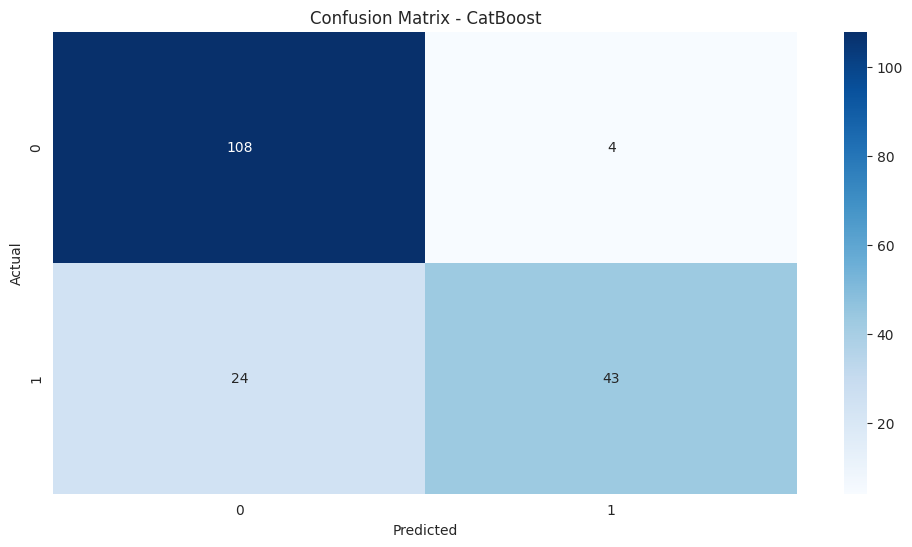

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for CatBoost (best model usually)
cm = confusion_matrix(y_test, cat_pred)

sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

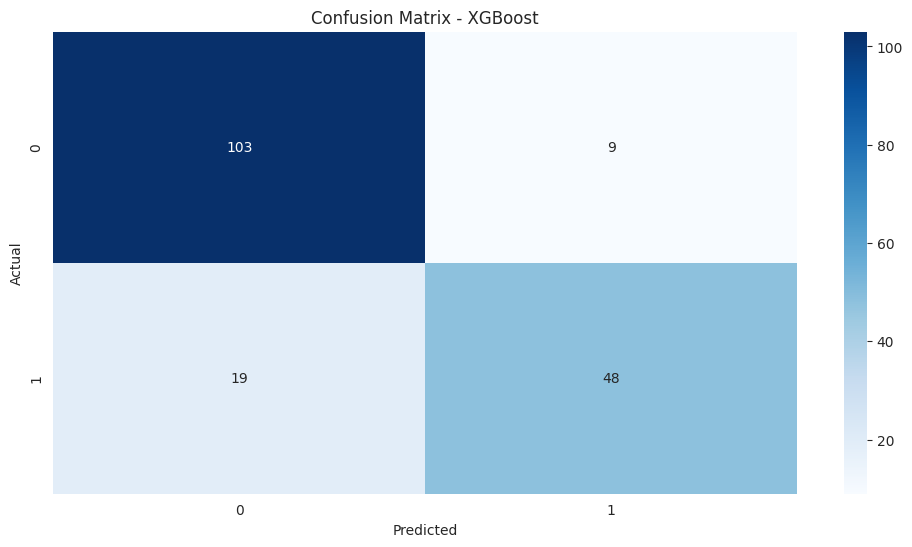

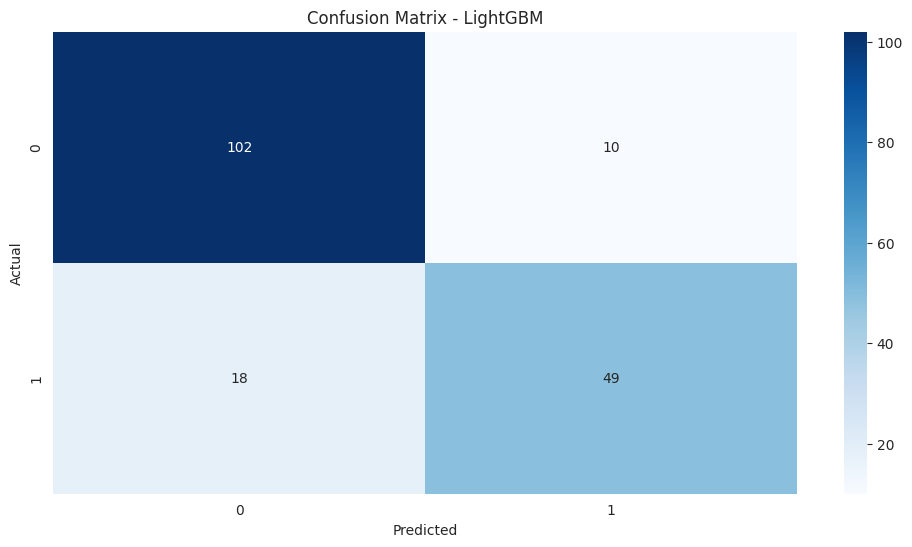

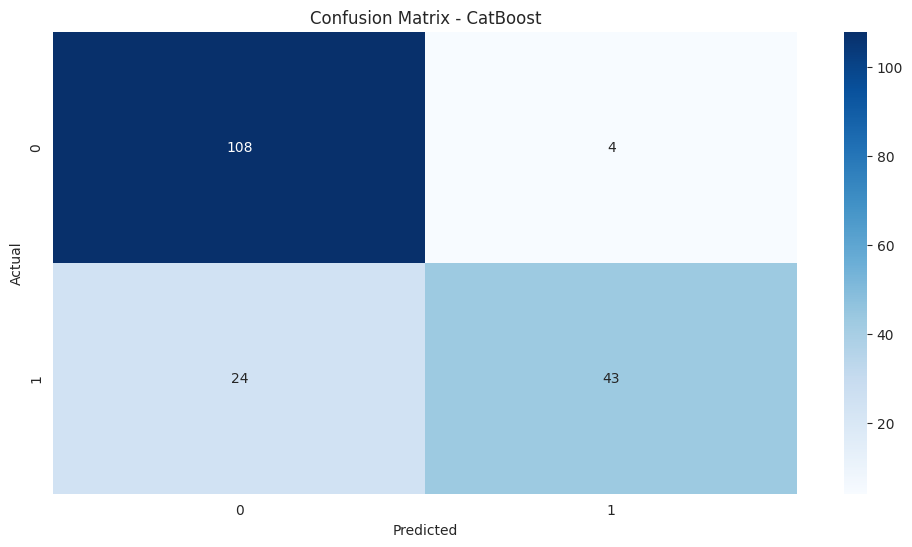

In [24]:
models = {
    'XGBoost': xgb_pred,
    'LightGBM': lgb_pred,
    'CatBoost': cat_pred
}

for name, pred in models.items():
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
